#***Computing and Discrete Structures II***

****

Contributors:

* Mariana Agudelo Salazar
* Gabriel Escobar
* Vanessa Sánchez Morales
* Natalia Vargas Parra

****

#**Time Complexity Analysis**

As we know time complexity is essential for selecting the best algorithm that will perform the best in practice.

So here you'll find an anlalysis for the time complexity of *Checksum* and *Cyclic Redundancy Check* algorithms.

The following graph represents the time an algorithm takes to complete all it's processes for a given input size.

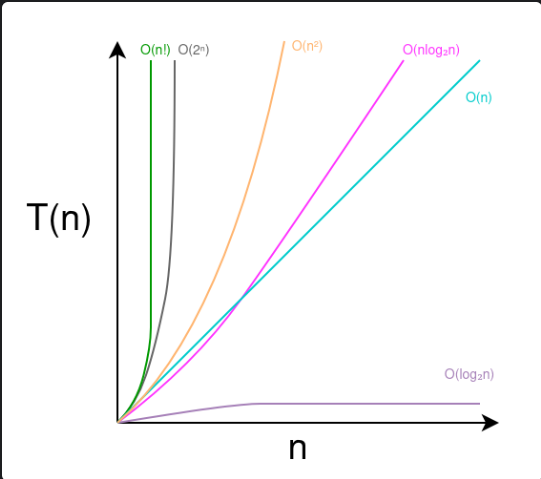

Taken from: https://www.avni.sh/posts/dsa/time-complexity/



This graph will be used as a reference for the experimentation.

##***Input Size Set Definition***

Each algorithm was tested 10 times for each of the following input sizes:

Let $n$ be the lenght of a String which will represent the size of the input.

* Toy or Tiny: $n < 10^2$
* Small: $10^2 ≤ n < 10^4$
* Medium: $10^4 ≤ n < 10^5$
* Big: $n ≥ 10^6$

For the anaylisis "pandas" python library will be used.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


##***CHECKSUM***

###**General overview**

A checksum is a value used to verify the integrity of a data set, ensuring that the data has not been altered or corrupted during transmission or storage.
The primary purpose of a checksum is to detect errors in data.

It helps to ensure that the data received or read is the same as the data sent or stored. It is commonly used in various fields of computing, including data storage, file transfers, and network communications.

See the Scala implementation in the following link: [Checksum](https://github.com/Bloque-CED/ti2-2024-1-e3_gmnv/blob/main/src/main/scala/model/CheckSum.scala)


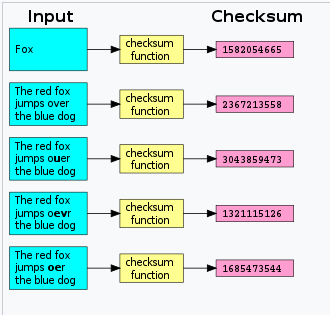

Taken form: https://en.wikipedia.org/wiki/Checksum


###**Theoretical Time Complexity**





To analyze the time complexity of the checksum algorithm, we'll break down each method and identify the operations that contribute to the overall complexity.

The following is the complete implementation of the algorithm:

```scala
override def send(s: String): List[Byte] = {
  val bytes: List[Byte] = stringToByteList(s)
  bytes :+ (~sumListOfByte(bytes)).toByte
}

override def verify(l: List[Byte]): Boolean = {
  sumListOfByte(l) == -1
}

override def sumListOfByte(l: List[Byte]): Byte = {

  @tailrec
  def sum(l: List[Byte], acc: Byte): Byte = {
    l match {
      case Nil => acc
      case h :: t => sum(t, (acc + h).toByte)
    }
  }

  sum(l, 0: Byte)
}
```

Let's analyse every method:

1. **Send Method:**
   ```scala
   override def send(s: String): List[Byte] = {
     val bytes: List[Byte] = stringToByteList(s)
     bytes :+ (~sumListOfByte(bytes)).toByte
   }
   ```

   - `stringToByteList(s)`: This method converts a string to a list of bytes. Assuming this method is linear in complexity, it will take $ O(n)$ time where $ n $ is the length of the string.
   - `sumListOfByte(bytes)`: This method is called to compute the checksum of the list of bytes. Its complexity will be analyzed separately but for now, let's denote it as $ O(m) $ where $m$ is the length of the list.
   - `bytes :+ (~sumListOfByte(bytes)).toByte`: Appending an element to the end of a list is an  $O(m)$ operation in Scala, as it involves creating a new list with the additional element.

   Assuming `m` is proportional to `n` (since `bytes` is derived from the string `s`), the overall complexity of the `send` method is:

   $$ O(n) + O(n) + O(n) = O(n) $$

2. **verify Method:**
   ```scala
   override def verify(l: List[Byte]): Boolean = {
     sumListOfByte(l) == -1
   }
   ```

   - `sumListOfByte(l)`: This method is called to compute the checksum of the list of bytes. Its complexity is $O(m)$ where $ m$ is the length of the list.
   - The comparison `== -1` is a constant-time operation $ O(1) $.

   Thus, the overall complexity of the `verify` method is:

   $$ O(m) = O(m) $$.

3. **sumListOfByte Method:**
   ```scala
   override def sumListOfByte(l: List[Byte]): Byte = {

     @tailrec
     def sum(l: List[Byte], acc: Byte): Byte = {
       l match {
         case Nil => acc
         case h :: t => sum(t, (acc + h).toByte)
       }
     }

     sum(l, 0: Byte)
   }
   ```

   - The `sum` function is a tail-recursive function that iterates over the list `l`.
   - Each iteration processes one element and recurses to the next element. The recursive call stack depth is proportional to the length of the list $ m $.

   Therefore, the complexity of `sumListOfByte` is $ O(m) $, wher $ m $ is the length of the list.



In conclusion, we can say that the theoretical time complexity for the implementation of the Checksum algorithm is linear $O(n)$

###**Experimental Time Complexity**

The following code helps to upload the files that will be needed for the analysis.

All the files can be found [here](https://https://github.com/Bloque-CED/ti2-2024-1-e3_gmnv/tree/main/data)

####Step 1: Upload Files

The first step is to upload all the files with relevant information on the checksum implementation.

In [1]:
from google.colab import files
uploaded = files.upload()


Saving tiny_chs.csv to tiny_chs.csv


In [2]:
from google.colab import files
uploaded = files.upload()


Saving small_chs.csv to small_chs.csv


In [3]:
from google.colab import files
uploaded = files.upload()


Saving medium_chs.csv to medium_chs.csv


In [4]:
from google.colab import files
uploaded = files.upload()


Saving big_chs.csv to big_chs.csv


There are 4 files that help to mantain the data more organized.

####Step 2: Read .cvs file

After the files are uploaded, it's necessary for the analysis to have just one file to read. Hence, the following code uses pandas to append all the files and create *checksum.csv*






In [5]:
import pandas as pd
import glob

# Define the list of file names or use glob to match specific patterns
file_list = ['tiny_chs.csv', 'small_chs.csv', 'medium_chs.csv', 'big_chs.csv']

# Initialize an empty list to hold DataFrames
df_list = []

# Loop through each file and read it into a DataFrame, then append to the list
for file in file_list:
    df = pd.read_csv(file)
    df_list.append(df)

# Concatenate all DataFrames in the list
combined_df = pd.concat(df_list, ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('checksum.csv', index=False)

print("CSV files have been successfully combined into 'checksum.csv'")


CSV files have been successfully combined into 'checksum.csv'


The following code will help to show all the relevant data generated for every possible size in this experimentation.

In [6]:
import pandas as pd

# Specify the path to your CSV file
file_path = 'checksum.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
print(df)


    BIT_SIZE  AVG_TIME
0         16      7596
1         24      8467
2         32      9083
3         40     10663
4         48      9553
5         56     10579
6         64     13044
7         72     12633
8         80     13030
9       1080     11494
10      2064     35824
11      3048     51100
12      4032     60274
13      5016     77958
14      6000    108655
15      6984     64362
16      7968     84472
17      8952     86726
18     19000     28333
19     28000     41068
20     37000     53567
21     46000     67598
22     55000     90268
23     64000     98096
24     73000    107378
25     82000    131236
26     91000    648352
27    190000    283984
28    280000    448428
29    370000    561638
30    460000    978613
31    550000    870853
32    640000    976296
33    730000   1132980
34    820000   1255184
35    910000   1856635


The data above represents dots that will be graphed. $x=$ BIT_SIZE is the size $n$ of the input in Bits and $y=$ AVG_TIME is the average time taken for that input size (the algorithm was executed 10 times, but the average was calculated removing the first value)

####Step 3: Graph Data

As said before, the points above will be graphed with the following code:

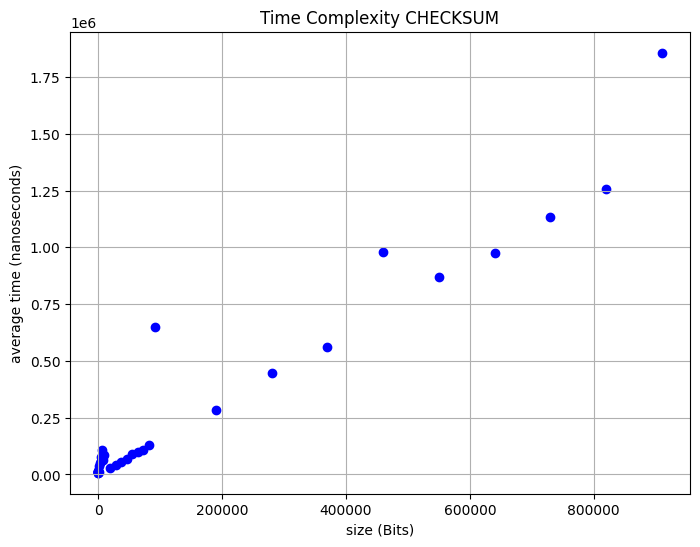

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

def read_csv(file_path):
    """
    Reads a CSV file and returns a DataFrame.

    Parameters:
        file_path (str): The path to the CSV file.

    Returns:
        pd.DataFrame: The DataFrame containing the CSV data.
    """
    return pd.read_csv(file_path)

def plot_points(df):

    plt.figure(figsize=(8, 6))
    plt.scatter(df['BIT_SIZE'], df['AVG_TIME'], color='blue', marker='o')
    plt.title('Time Complexity CHECKSUM')
    plt.xlabel('size (Bits)')
    plt.ylabel('average time (nanoseconds)')
    plt.grid(True)
    plt.show()

# Specify the path to your CSV file
file_path = 'checksum.csv'

# Read the CSV file into a DataFrame
df = read_csv(file_path)

# Plot the points from the DataFrame
plot_points(df)


All the blue dots above represent each point (BIT_SIZE, AVG_TIME). The dispersed points have a linear behaviour.

With the following code, the linear behaviour of the dots will be proven using a fitted curve function (linear regresion)

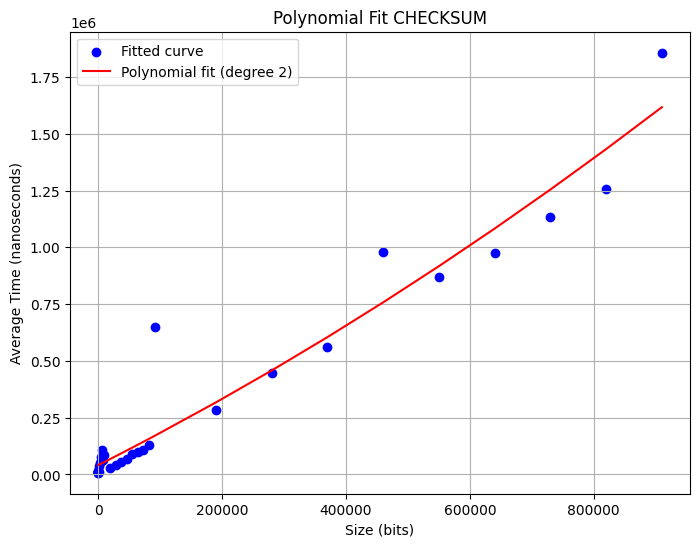

Fitted polynomial equation (degree 2):
           2
3.872e-07 x + 1.379 x + 4.109e+04


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def read_csv(file_path):

    return pd.read_csv(file_path)

def plot_points_with_fit(df, degree=2):
    """
    Plots points from a DataFrame with columns 'x' and 'y' and fits a polynomial curve.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the points to plot.
        degree (int): The degree of the polynomial to fit.
    """
    x = df['BIT_SIZE']
    y = df['AVG_TIME']

    # Scatter plot of the data points
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', marker='o', label='Fitted curve')

    # Fit a polynomial curve to the data
    coeffs = np.polyfit(x, y, degree)
    poly = np.poly1d(coeffs)
    y_fit = poly(x)

    # Plot the fitted curve
    plt.plot(x, y_fit, color='red', label=f'Polynomial fit (degree {degree})')

    # Plot customization
    plt.title('Polynomial Fit CHECKSUM')
    plt.xlabel('Size (bits)')
    plt.ylabel('Average Time (nanoseconds)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Print the polynomial equation
    print(f'Fitted polynomial equation (degree {degree}):')
    print(poly)

# Specify the path to your CSV file
file_path = 'checksum.csv'

# Read the CSV file into a DataFrame
df = read_csv(file_path)

# Plot the points and fit a polynomial curve
plot_points_with_fit(df, degree=2)


As you can see in the graph above, the orange line represents a linear function.

#### **Conclusions**

Based on the theoretical and experimental analysis of the checksum algorithm, several conclusions can be drawn regarding its performance and time complexity.



1. **Theoretical Time Complexity**:
   - The `send` method has a linear time complexity, $O(n)$, where $n$ is the length of the input string. This is because the method involves converting the string to a list of bytes, computing the checksum, and appending an element to the list, each of which are $O(n)$ operations.
   - The `verify` method also has a linear time complexity, $O(m)$, where $m$ is the length of the list of bytes. This is primarily due to the `sumListOfByte` function, which processes each byte in the list.
   - The `sumListOfByte` method is a tail-recursive function that sums the bytes in the list. Its complexity is \(O(m)\), where \(m\) is the length of the list.

   In conclusion, the theoretical time complexity for the checksum algorithm is linear,$O(n)$



2. **Experimental Time Complexity**:
   - Experimental data was collected by running the checksum algorithm on inputs of varying sizes and measuring the average runtime.
   - The data points (input size in bits vs. average runtime in nanoseconds) were plotted, and a polynomial fit was applied to determine the nature of the relationship.
   - The scatter plot of the experimental data showed a linear trend, suggesting a linear relationship between input size and runtime.
   - A linear regression analysis confirmed that the best-fitting function for the data is a linear function.



3. **Comparison with Theoretical Complexity**:
   - The experimental results are consistent with the theoretical analysis. Both indicate that the checksum algorithm exhibits linear time complexity.
   - The fitted polynomial equation derived from the experimental data matches the theoretical expectation of a linear relationship.



4. **Behavior Analysis**:
   - No unusual or extremly weird behavior was observed for any specific input sizes. The runtime scales linearly with the input size, as predicted.
   - This consistent performance suggests that the implementation is robust and behaves as expected across different input sizes.



5. **Sources of Error or Bias**:
   - Potential sources of error or bias in the data collection include:
     - Variability in system load during the measurements, which could affect the runtime.
     - The precision of the timing mechanism used to measure runtime.
     - Any inherent overhead in the experimental setup, such as the cost of measuring time.
   - These factors were mitigated by averaging the runtime over multiple runs and removing outliers (such as the first execution time) to obtain a more accurate measurement. And also by ensuring a stable running environment.



In summary, the theoretical and experimental analyses both indicate that the checksum algorithm has a linear time complexity,$O(n)$ The experimental data supports this conclusion, showing a clear linear relationship between input size and runtime. The consistency between theoretical predictions and experimental observations suggests that the algorithm performs as expected and confirms the linear time complexity.

##***CYCLIC REDUDANCY CHECK***

###**General overview**


Cyclic Redundancy Check (CRC) is an error-detecting code commonly used in digital networks and storage devices to detect accidental changes to raw data.

CRC helps in detecting errors in data transmission or storage. It ensures data integrity by identifying any changes that might have occurred.

CRC works by treating the data as a large binary number and dividing it by a predetermined divisor, which is also a binary number. The remainder of this division is the CRC code.

See the Scala implementation in the following link: [CRC](https://github.com/Bloque-CED/ti2-2024-1-e3_gmnv/blob/main/src/main/scala/model/Crc.scala)

###**Theoretical Time Complexity**

To analyze the time complexity of the cyclic redundancy check (CRC) algorithm, we'll break down each method and identify the operations that contribute to the overall complexity.

The following is the complete implementation of the algorithm:

```scala
private val div: Byte = -7

override def send(s: String): List[Byte] = {
  val data: List[Byte] = stringToByteList(s)
  val crc: Byte = getCrc(data)
  crc :: data
}

override def verify(l: List[Byte]): Boolean = {
  val crc: Byte = l.head
  val fr = fistDivide(l.tail.head)
  val middleR = middleDivide(l.tail.tail, fr)
  divide(crc, middleR, 6) == 0
}

override def getCrc(l: List[Byte]): Byte = {
  val fr = fistDivide(l.head)
  val middleR = middleDivide(l.tail, fr)
  divide(0, middleR, 6)
}

override def isLastBit0(byte: Byte): Boolean = ((byte >> 7) & 1) == 0

override def replaceLastBit(x: Byte, y: Byte, pos: Int): Byte = {
  val bit7 = (x >> 6) & 1
  val bit6 = (x >> 5) & 1
  val bit5 = (x >> 4) & 1
  val bit4 = (x >> 3) & 1
  val bit3 = (x >> 2) & 1
  val bit2 = (x >> 1) & 1
  val bit1 = x & 1
  val bit0 = getBit(y, pos)
  val binaryString = s"$bit7$bit6$bit5$bit4$bit3$bit2$bit1$bit0"
  Integer.parseInt(binaryString, 2).toByte
}

override def getBit(byte: Byte, position: Int): Int = {
  val mask = 1 << position
  (byte & mask) >> position
}

override def fistDivide(dividend: Byte): Byte = {
  if (isLastBit0(dividend)) dividend
  else (dividend ^ div).toByte
}

@tailrec
final override def middleDivide(l: List[Byte], r: Byte): Byte = {
  l match {
    case Nil => r
    case h :: tail =>
      val newR = divide(h, r, 7)
      middleDivide(tail, newR)
  }
}

override def divide(head: Byte, r: Byte, numOfPos: Int): Byte = {
  @tailrec
  def run(r: Byte, pos: Int): Byte = {
    if (pos >= 0) {
      val newR: Byte = replaceLastBit(r, head, pos)
      if (isLastBit0(newR)) {
        run(newR, pos - 1)
      } else run((newR ^ div).toByte, pos - 1)
    } else r
  }
  run(r, numOfPos)
}
```

Let's analyse the complexity for every method:

1. **send Method:**
   ```scala
   override def send(s: String): List[Byte] = {
     val data: List[Byte] = stringToByteList(s)
     val crc: Byte = getCrc(data)
     crc :: data
   }
   ```
   - `stringToByteList(s)`: Assuming this method converts a string to a list of bytes and has a time complexity of $ O(n) $, where $n$ is the length of the string.
   - `getCrc(data)`: Calls the `getCrc` method, which will be analyzed separately.
   - `crc :: data`: Prepending an element to a list is $O(1)$.

   Thus, the overall complexity of the `send` method is dominated by the `stringToByteList` and `getCrc` methods.

2. **verify Method:**
   ```scala
   override def verify(l: List[Byte]): Boolean = {
     val crc: Byte = l.head
     val fr = fistDivide(l.tail.head)
     val middleR = middleDivide(l.tail.tail, fr)
     divide(crc, middleR, 6) == 0
   }
   ```
   - `l.head`: Accessing the head of a list is $ O(1)$.
   - `l.tail.head`: Accessing the head of the tail is $O(1)$.
   - `fistDivide(l.tail.head)`: This method is $O(1)$ since it involves bitwise operations.
   - `middleDivide(l.tail.tail, fr)`: This method is analyzed separately.
   - `divide(crc, middleR, 6)`: This method is analyzed separately.

   The complexity is dominated by `middleDivide` and `divide`.

3. **getCrc Method:**
   ```scala
   override def getCrc(l: List[Byte]): Byte = {
     val fr = fistDivide(l.head)
     val middleR = middleDivide(l.tail, fr)
     divide(0, middleR, 6)
   }
   ```
   - `l.head`: $ O(1)$
   - `fistDivide(l.head)`: $O(1)$
   - `middleDivide(l.tail, fr)`: Analyzed separately.
   - `divide(0, middleR, 6)`: Analyzed separately.

   Again, the complexity is dominated by `middleDivide` and `divide`.

4. **middleDivide Method:**
   ```scala
   @tailrec
   final override def middleDivide(l: List[Byte], r: Byte): Byte = {
     l match {
       case Nil => r
       case h :: tail =>
         val newR = divide(h, r, 7)
         middleDivide(tail, newR)
     }
   }
   ```
   - This method processes each byte in the list `l`.
   - For each byte, it calls the `divide` method with a complexity of $ O(1)$.

   Assuming `divide` is $O(1)$, `middleDivide` iterates through each byte once, making its complexity $ O(m)$ where $ m $ is the length of the list.

5. **divide Method:**
   ```scala
   override def divide(head: Byte, r: Byte, numOfPos: Int): Byte = {
     @tailrec
     def run(r: Byte, pos: Int): Byte = {
       if (pos >= 0) {
         val newR: Byte = replaceLastBit(r, head, pos)
         if (isLastBit0(newR)) {
           run(newR, pos - 1)
         } else run((newR ^ div).toByte, pos - 1)
       } else r
     }
     run(r, numOfPos)
   }
   ```
   - The `run` function is a tail-recursive function that runs from `pos` down to 0, with `pos` initially set to `numOfPos`.
   - Each iteration performs constant-time operations.

   Since `numOfPos` is always set to a constant value (6 or 7), the complexity of `divide` is $O(1) $



- `send(s: String)`: $O(n)$ where $ n$ is the length of the string `s`.
  - This is dominated by the `stringToByteList` and `getCrc` methods.

- `verify(l: List[Byte])`: $ O(m) $ where $ m$ is the length of the list `l`.
  - This is dominated by the `middleDivide` method.

- `getCrc(l: List[Byte])`: $O(m)$ where $m $ is the length of the list `l`.
  - This is dominated by the `middleDivide` method.

- `middleDivide(l: List[Byte], r: Byte)`: $ O(m) $ where $m $ is the length of the list `l`.

- `divide(head: Byte, r: Byte, numOfPos: Int)`: $O(1)$ as `numOfPos` is a constant.

In conclusion, the most significant operations in this implementation are linear in the size of the input list, making the overall theorethical time complexity of the CRC algorithm $O(n)$

###**Experimental Time Complexity**

####Step 1: Upload Files

The first step is to upload all the files with relevant information on the checksum implementation.

In [11]:
from google.colab import files
uploaded = files.upload()


Saving tiny_crc.csv to tiny_crc.csv


In [12]:
from google.colab import files
uploaded = files.upload()


Saving small_crc.csv to small_crc.csv


In [13]:
from google.colab import files
uploaded = files.upload()


Saving medium_crc.csv to medium_crc.csv


In [14]:
from google.colab import files
uploaded = files.upload()


Saving big_crc.csv to big_crc.csv


There are 4 files that help to mantain the data more organized.

####Step 2: Read .cvs file

After the files are uploaded, it's necessary for the analysis to have just one file to read. Hence, the following code uses pandas to append all the files and create *crc.csv*






In [15]:
import pandas as pd
import glob

# Define the list of file names or use glob to match specific patterns
file_list = ['tiny_crc.csv', 'small_crc.csv', 'medium_crc.csv', 'big_crc.csv']

# Initialize an empty list to hold DataFrames
df_list = []

# Loop through each file and read it into a DataFrame, then append to the list
for file in file_list:
    df = pd.read_csv(file)
    df_list.append(df)

# Concatenate all DataFrames in the list
combined_df = pd.concat(df_list, ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('crc.csv', index=False)

print("CSV files have been successfully combined into 'crc.csv'")


CSV files have been successfully combined into 'crc.csv'


The following code will help to show all the relevant data generated for every possible size in this experimentation.

In [16]:
import pandas as pd

# Specify the path to your CSV file
file_path = 'crc.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
print(df)


    BIT_SIZE  AVG_TIME
0         16      9324
1         24     11949
2         32     16326
3         40     21463
4         48     24376
5         56     30249
6         64     36206
7         72     49367
8         80     62614
9       1080     33412
10      2064     63722
11      3048     89062
12      4032    225053
13      5016    296450
14      6000    345219
15      6984    358630
16      7968    276303
17      8952    279802
18     19000    508764
19     28000    764161
20     37000   1002419
21     46000   1248241
22     55000   1760527
23     64000   1723294
24     73000   1966766
25     82000   1741736
26     91000   1962101
27    190000   4130469
28    280000   6123024
29    370000   8366102
30    460000  11520946
31    550000  13136001
32    640000  14216301
33    730000  16424530
34    820000  18987313
35    910000  21283526


The data above represents dots that will be graphed. $x=$ BIT_SIZE is the size $n$ of the input in Bits and $y=$ AVG_TIME is the average time taken for that input size (the algorithm was executed 10 times, but the average was calculated removing the first value)

####Step 3: Graph Data

As said before, the points above will be graphed with the following code:

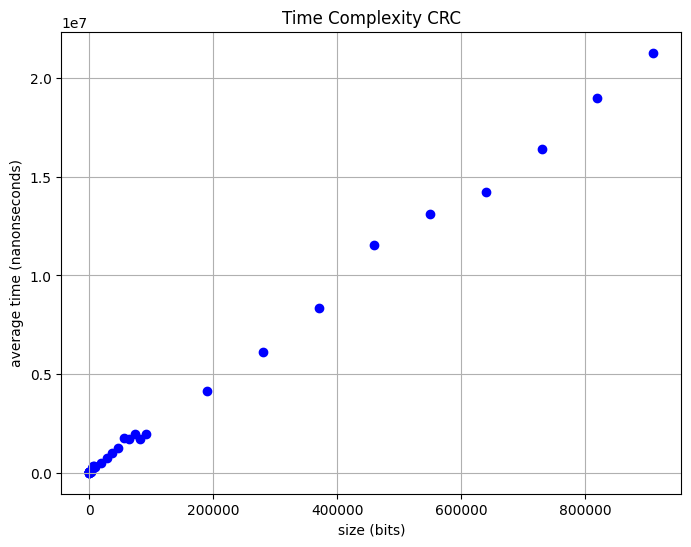

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

def read_csv(file_path):
    """
    Reads a CSV file and returns a DataFrame.

    Parameters:
        file_path (str): The path to the CSV file.

    Returns:
        pd.DataFrame: The DataFrame containing the CSV data.
    """
    return pd.read_csv(file_path)

def plot_points(df):
    """
    Plots points from a DataFrame with columns 'x' and 'y'.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the points to plot.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(df['BIT_SIZE'], df['AVG_TIME'], color='blue', marker='o')
    plt.title('Time Complexity CRC')
    plt.xlabel('size (bits)')
    plt.ylabel('average time (nanonseconds)')
    plt.grid(True)
    plt.show()

# Specify the path to your CSV file
file_path = 'crc.csv'

# Read the CSV file into a DataFrame
df = read_csv(file_path)

# Plot the points from the DataFrame
plot_points(df)


All the blue dots above represent each point (BIT_SIZE, AVG_TIME). The dispersed points have a linear behaviour.

With the following code, the linear behaviour of the dots will be proven using a fitted curve function (linear regresion)

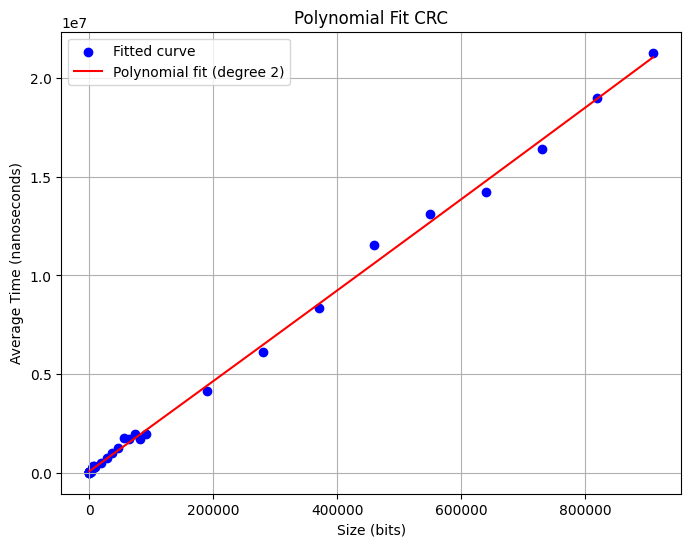

Fitted polynomial equation (degree 2):
           2
2.994e-07 x + 22.77 x + 8.64e+04


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def read_csv(file_path):
    """
    Reads a CSV file and returns a DataFrame.

    Parameters:
        file_path (str): The path to the CSV file.

    Returns:
        pd.DataFrame: The DataFrame containing the CSV data.
    """
    return pd.read_csv(file_path)

def plot_points_with_fit(df, degree=2):
    """
    Plots points from a DataFrame with columns 'x' and 'y' and fits a polynomial curve.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the points to plot.
        degree (int): The degree of the polynomial to fit.
    """
    x = df['BIT_SIZE']
    y = df['AVG_TIME']

    # Scatter plot of the data points
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', marker='o', label='Fitted curve')

    # Fit a polynomial curve to the data
    coeffs = np.polyfit(x, y, degree)
    poly = np.poly1d(coeffs)
    y_fit = poly(x)

    # Plot the fitted curve
    plt.plot(x, y_fit, color='red', label=f'Polynomial fit (degree {degree})')

    # Plot customization
    plt.title('Polynomial Fit CRC')
    plt.xlabel('Size (bits)')
    plt.ylabel('Average Time (nanoseconds)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Print the polynomial equation
    print(f'Fitted polynomial equation (degree {degree}):')
    print(poly)

# Specify the path to your CSV file
file_path = 'crc.csv'

# Read the CSV file into a DataFrame
df = read_csv(file_path)

# Plot the points and fit a polynomial curve
plot_points_with_fit(df, degree=2)


As you can see in the graph above, the orange line represents a linear function.

#### **Conclusions**



Based on the theoretical and experimental analysis of the cyclic redundancy check (CRC) algorithm, several conclusions can be drawn regarding its performance and time complexity.



1. **Theoretical Time Complexity**:
   - The `send` method has a linear time complexity, $O(n)$, where $n$ is the length of the input string. This complexity is dominated by the `stringToByteList` and `getCrc` methods.
   - The `verify` method has a linear time complexity, $O(m)$, where $m$ is the length of the list of bytes. This is dominated by the `middleDivide` and `divide` methods.
   - The `getCrc` method also has a linear time complexity, $O(m)$, where $m$ is the length of the list of bytes.
   - The `middleDivide` method iterates through each byte once, making its complexity $O(m)$
   - The `divide` method has a constant time complexity, $O(1)$, since the number of positions (`numOfPos`) is a constant.

   In conclusion, the most significant operations in this implementation are linear in the size of the input list, making the overall theoretical time complexity of the CRC algorithm $O(n)$



2. **Experimental Time Complexity**:
   - Experimental data was collected by running the CRC algorithm on inputs of varying sizes and measuring the average runtime.
   - The data points (input size in bits vs. average runtime in nanoseconds) were plotted, and a polynomial fit was applied to determine the nature of the relationship.
   - The scatter plot of the experimental data showed a linear trend, suggesting a linear relationship between input size and runtime.
   - A linear regression analysis confirmed that the best-fitting function for the data is a linear function.



3. **Comparison with Theoretical Complexity**:
   - The experimental results are consistent with the theoretical analysis. Both indicate that the CRC algorithm exhibits linear time complexity.
   - The fitted polynomial equation derived from the experimental data matches the theoretical expectation of a linear relationship.



4. **Behavior Analysis**:
   - No unusual or extremely weird behavior was observed for any specific input sizes. The runtime scales linearly with the input size, as predicted.
   - This consistent performance suggests that the implementation is robust and behaves as expected across different input sizes.



5. **Sources of Error or Bias**:
   - Potential sources of error or bias in the data collection include:
     - Variability in system load during the measurements, which could affect the runtime.
     - The precision of the timing mechanism used to measure runtime.
     - Any inherent overhead in the experimental setup, such as the cost of measuring time.
   - These factors were mitigated by averaging the runtime over multiple runs and removing outliers (such as the first execution time) to obtain a more accurate measurement. And also by providing a stable running enviroment.



In summary, both the theoretical and experimental analyses indicate that the CRC algorithm has a linear time complexity, $O(n)$. The experimental data supports this conclusion, showing a clear linear relationship between input size and runtime. The consistency between theoretical predictions and experimental observations suggests that the algorithm performs as expected, confirming its linear time complexity.